
=====================
分类比较
=====================

scikit-learn 中的几个分类器在合成数据集上的比较。
这个例子的目的是说明不同分类器的决策边界的性质。
这仿佛是大海中的一滴水，因为这些例子所传达的直觉不一定会转移到真正的数据集上。

特别是在高维空间中，数据可以更容易地线性分离，诸如朴素贝叶斯和线性 SVM 之类的分类器的简单性可能导致比其他分类器更好的泛化。

绘图显示了纯色和测试点半透明的训练点。右下方显示了测试仪的分类精度。

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

#神经网络
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  #支持向量机
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#一共有3个朴素贝叶斯的分类算法类。分别是GaussianNB，MultinomialNB和BernoulliNB。
#其中GaussianNB就是先验为高斯分布的朴素贝叶斯，MultinomialNB就是先验为多项式分布的朴素贝叶斯，
#而BernoulliNB就是先验为伯努利分布的朴素贝叶斯。
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h =.02 # 网格中的步长

# 各分类器对应的名称
# 各分类器为 1.k-近邻，也就是 kNN 2. 线性支持向量机 3. 带有 RBF 核的 SVM 4.高斯过程 5.决策树 6.随机森林 7.神经网络 8.集成方法 AdaBoost 9.朴素贝叶斯 10.二次判别分析
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

# 具体的分类器参数和调用
classifiers = [
    KNeighborsClassifier(3),
  #  SVC(kernel="linear", C=0.025),
  #  SVC(gamma=2, C=1),
  #  GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
  #  DecisionTreeClassifier(max_depth=5),
  #  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
  #  MLPClassifier(alpha=1),
  #  AdaBoostClassifier(),
   # GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

#此命令将会产生一个随机状态种子
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

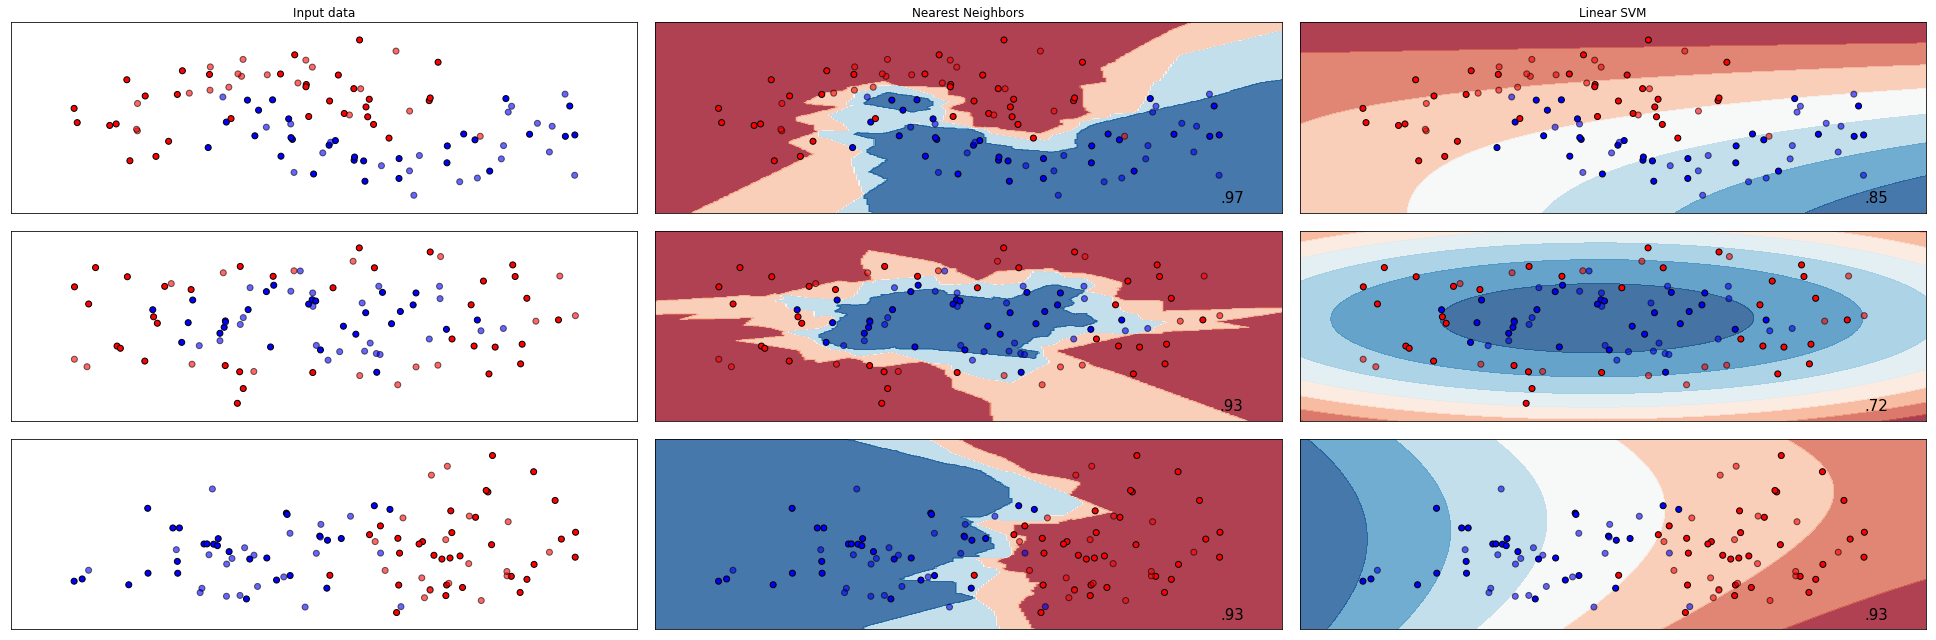

In [7]:
figure = plt.figure(figsize=(27,9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    # 预处理数据集，分为训练和测试部分
    X, y = ds
        # StandardScaler() 计算训练集的平均值和标准差，以便测试数据集使用相同的变换.具体的参见：http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    # fit_transform() 先拟合数据，然后转化它将其转化为标准形式.
    # train_test_split() 随机划分训练集和测试集
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
        
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 那我们就首先将数据集绘制出来
    cm = plt.cm.RdBu
    # ListedColormap() 是一个以参数中的列出的颜色来映射的函数。
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # subplot() 在绘图区域的子区域中画图
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        # 设置 title
        ax.set_title("Input data")
    # 绘制训练集中的点
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # 绘制测试集中的点
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    # set_xlim() 设置 x 轴范围
    ax.set_xlim(xx.min(), xx.max())
    # set_ylim() 设置 y 轴范围
    ax.set_ylim(yy.min(), yy.max())
    # set_xticks 设置 x 轴坐标点
    ax.set_xticks(())
    # set_yticks() 设置 y 轴坐标点
    ax.set_yticks(())
    i += 1

    # 迭代上面我们列出来的几个分类器
    # zip() 函数接受任意多个（包括0个或1个）序列作为参数，返回一个 tuple 列表。具体请参见：http://www.cnblogs.com/frydsh/archive/2012/07/10/2585370.html
    for name, clf in zip(names, classifiers):
        # 为每个分类器分配一个画图的小的子绘图区域
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # 拟合分类器
        clf.fit(X_train, y_train)
        # 计算每个分类器的分数
        score = clf.score(X_test, y_test)

        # 绘制决策边界。为此，我们将为网格 [x_min, x_max]x[y_min, y_max] 中的每个点分配一个颜色。
        if hasattr(clf, "decision_function"):
            # decision_function() 计算点到决策边界的函数间隔
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # 将结果放入彩色图中
        Z = Z.reshape(xx.shape)
        # contourf() 绘制等高线
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # 绘制训练集中的数据点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # 也将测试点绘制出来
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

# tight_layout() 自动调整子图参数以给定指定的填充
plt.tight_layout()
plt.show()
    